In [1]:
import pandas as pd
from sqlalchemy import create_engine

db_params = {
    'dbname': 'defaultdb',
    'user': 'avnadmin',
    'password': 'AVNS_CJutBDRG4jmNiHq93DM',
    'host': 'pg-328dcccd-petergatitu61-111d.i.aivencloud.com',
    'port': '14741'
}

engine = create_engine(f"postgresql://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['dbname']}")

query = "SELECT * FROM solar.data;"

df = pd.read_sql(query, engine)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh),Column5,Column6
0,0.0,01/01/2020 00:00,0.0,1.509849,,
1,1.0,01/01/2020 01:00,0.0,1.411859,,
2,2.0,01/01/2020 02:00,0.0,1.023898,,
3,3.0,01/01/2020 03:00,0.0,0.642000,,
4,4.0,01/01/2020 04:00,0.0,0.960000,,


In [4]:
df = df.drop(df.columns[[4,5]], axis=1)

In [5]:
df.head()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0.0,01/01/2020 00:00,0.0,1.509849
1,1.0,01/01/2020 01:00,0.0,1.411859
2,2.0,01/01/2020 02:00,0.0,1.023898
3,3.0,01/01/2020 03:00,0.0,0.642000
4,4.0,01/01/2020 04:00,0.0,0.960000


### DATA EXPLORATION

In [6]:
# SHAPE
df.shape

(82734, 4)

In [7]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82734 entries, 0 to 82733
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Hour                                8760 non-null   float64
 1   Date/hour start                     82734 non-null  object 
 2   Solar electricity generation (kWh)  8760 non-null   float64
 3   Electricity usage (kWh)             8760 non-null   float64
dtypes: float64(3), object(1)
memory usage: 2.5+ MB


In [8]:
#last 5 rows
df.tail()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
82729,NaN,,NaN,NaN
82730,NaN,,NaN,NaN
82731,NaN,,NaN,NaN
82732,NaN,,NaN,NaN
82733,NaN,,NaN,NaN


In [9]:
df.isnull().sum()

Hour                                  73974
Date/hour start                           0
Solar electricity generation (kWh)    73974
Electricity usage (kWh)               73974
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [12]:
df.shape

(8760, 4)

In [13]:
df.tail()

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
8755,19.0,31/12/2020 19:00,0.012,4.395600
8756,20.0,31/12/2020 20:00,0.003,4.560600
8757,21.0,31/12/2020 21:00,0.000,2.022000
8758,22.0,31/12/2020 22:00,0.015,1.668000
8759,23.0,31/12/2020 23:00,0.000,0.805919


In [14]:
# rename columns
df.columns

Index(['Hour', 'Date/hour start', 'Solar electricity generation (kWh)',
       'Electricity usage (kWh)'],
      dtype='object')

In [15]:
df.rename(columns={'Hour':'hour',
                   'Date/hour start':'date_hour_start',
                   'Solar electricity generation (kWh)':'solar_kwh',
                   'Electricity usage (kWh)':'electric_usage_kwh'}, inplace=True)

In [16]:
df.head()

,hour,date_hour_start,solar_kwh,electric_usage_kwh
0,0.0,01/01/2020 00:00,0.0,1.509849
1,1.0,01/01/2020 01:00,0.0,1.411859
2,2.0,01/01/2020 02:00,0.0,1.023898
3,3.0,01/01/2020 03:00,0.0,0.642000
4,4.0,01/01/2020 04:00,0.0,0.960000


In [17]:
avg_hour = df.groupby('hour')[['solar_kwh', 'electric_usage_kwh']].mean()

In [18]:
avg_hour

,solar_kwh,electric_usage_kwh
hour,,
0.0,0.000000,0.816471
1.0,0.035753,0.401552
2.0,0.000000,0.250623
3.0,0.000000,0.407688
4.0,0.078559,0.552038
5.0,0.270625,0.610852
6.0,0.722868,2.084071
7.0,1.394885,1.788123
8.0,2.206044,1.798899


<Axes: xlabel='hour'>

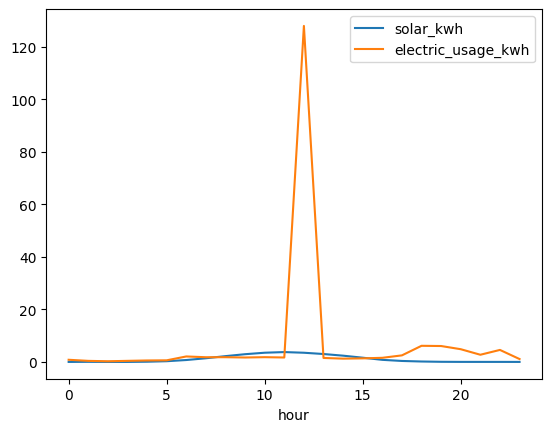

In [19]:
avg_hour.plot(kind='line')

<Axes: ylabel='solar_kwh'>

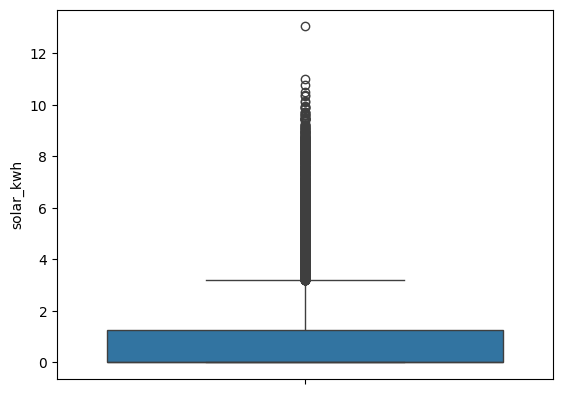

In [20]:
sns.boxplot(y='solar_kwh', data=df)

<Axes: ylabel='electric_usage_kwh'>

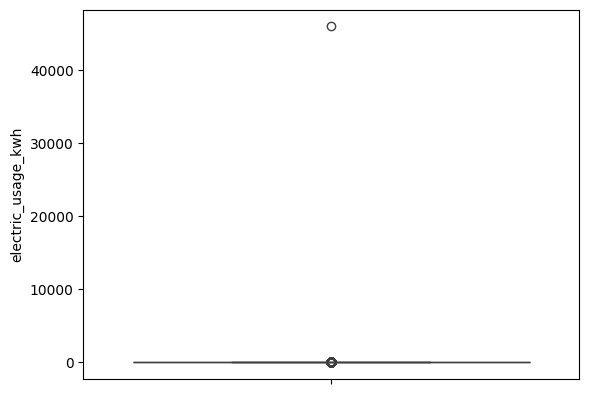

In [21]:
sns.boxplot(y='electric_usage_kwh', data=df)

In [22]:
#IQR
df.describe()

,hour,solar_kwh,electric_usage_kwh
count,8760.000000,8760.000000,8760.000000
mean,11.500000,1.116750,7.312704
std,6.922582,2.026098,491.479806
min,0.000000,0.000000,-12.624000
25%,5.750000,0.000000,0.300000
50%,11.500000,0.024000,0.621000
75%,17.250000,1.272750,1.686000
max,23.000000,13.050000,46000.000000


In [23]:
q1 = df['electric_usage_kwh'].quantile(0.25)
q3 = df['electric_usage_kwh'].quantile(0.75)

iqr=q3-q1

low = q1-iqr*1.5
up  = q3+iqr*1.5

> tilde = useful filtering rows 

In [24]:
df = df[~((df['electric_usage_kwh'] < low) | (df['electric_usage_kwh']> up ))]

<Axes: ylabel='electric_usage_kwh'>

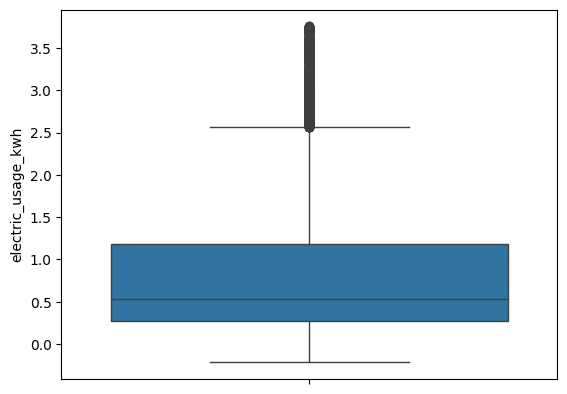

In [25]:
sns.boxplot(y='electric_usage_kwh', data=df)

In [47]:
df = df[~((df['solar_kwh'] < low) | (df['solar_kwh']> up ))]

In [48]:
avg_hour1 = df.groupby('hour')[['solar_kwh', 'electric_usage_kwh']].mean()

<Axes: xlabel='hour'>

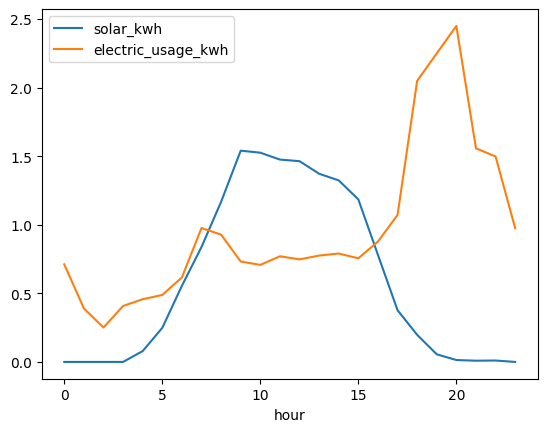

In [49]:
avg_hour1.plot(kind='line')

In [28]:
df.shape

(7771, 4)

In [29]:
avg_hour1

,solar_kwh,electric_usage_kwh
hour,,
0.0,0.000000,0.711209
1.0,0.035852,0.389828
2.0,0.000000,0.250623
3.0,0.000000,0.407688
4.0,0.078975,0.457097
5.0,0.261501,0.487081
6.0,0.685047,0.629374
7.0,1.422397,0.897858
8.0,2.289175,0.784518


### Step (ii): Calculating Electricity Bought

In this step, the project calculates the electricity needed to be bought from the provider by subtracting the solar electricity generation from the electricity usage. The numpy library is used to efficiently perform element-wise subtraction and limit the result to non-negative values.


In [30]:
df.columns

Index(['hour', 'date_hour_start', 'solar_kwh', 'electric_usage_kwh'], dtype='object')

In [31]:
df['elec_to_buy'] = df['electric_usage_kwh']-df['solar_kwh']

In [32]:
df.head()

,hour,date_hour_start,solar_kwh,electric_usage_kwh,elec_to_buy
0,0.0,01/01/2020 00:00,0.0,1.509849,1.509849
1,1.0,01/01/2020 01:00,0.0,1.411859,1.411859
2,2.0,01/01/2020 02:00,0.0,1.023898,1.023898
3,3.0,01/01/2020 03:00,0.0,0.642000,0.642000
4,4.0,01/01/2020 04:00,0.0,0.960000,0.960000


In [33]:
df.tail()

,hour,date_hour_start,solar_kwh,electric_usage_kwh,elec_to_buy
8752,16.0,31/12/2020 16:00,0.033,1.383000,1.350000
8753,17.0,31/12/2020 17:00,0.012,1.413000,1.401000
8757,21.0,31/12/2020 21:00,0.000,2.022000,2.022000
8758,22.0,31/12/2020 22:00,0.015,1.668000,1.653000
8759,23.0,31/12/2020 23:00,0.000,0.805919,0.805919


In [34]:
df.loc[df['elec_to_buy']< 0, 'elec_to_buy'] = 0

In [35]:
df.head(20)

,hour,date_hour_start,solar_kwh,electric_usage_kwh,elec_to_buy
0,0.0,01/01/2020 00:00,0.000,1.509849,1.509849
1,1.0,01/01/2020 01:00,0.000,1.411859,1.411859
2,2.0,01/01/2020 02:00,0.000,1.023898,1.023898
3,3.0,01/01/2020 03:00,0.000,0.642000,0.642000
4,4.0,01/01/2020 04:00,0.000,0.960000,0.960000
5,5.0,01/01/2020 05:00,0.012,0.897000,0.885000
6,6.0,01/01/2020 06:00,0.006,0.648000,0.642000
7,7.0,01/01/2020 07:00,0.009,0.774000,0.765000
8,8.0,01/01/2020 08:00,0.012,1.299000,1.287000
9,9.0,01/01/2020 09:00,0.846,0.606000,0.000000


### Step (iii): Calculating Excess Solar Generation

The excess solar electricity generated is calculated by subtracting the electricity usage from the solar electricity generation. Similar to Step (ii), numpy is used to perform element-wise subtraction and limit the result to non-negative values.


In [36]:
df['solar_excess'] = df['solar_kwh']-df['electric_usage_kwh']

In [37]:
df.head(25)

,hour,date_hour_start,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess
0,0.0,01/01/2020 00:00,0.000,1.509849,1.509849,-1.509849
1,1.0,01/01/2020 01:00,0.000,1.411859,1.411859,-1.411859
2,2.0,01/01/2020 02:00,0.000,1.023898,1.023898,-1.023898
3,3.0,01/01/2020 03:00,0.000,0.642000,0.642000,-0.642000
4,4.0,01/01/2020 04:00,0.000,0.960000,0.960000,-0.960000
5,5.0,01/01/2020 05:00,0.012,0.897000,0.885000,-0.885000
6,6.0,01/01/2020 06:00,0.006,0.648000,0.642000,-0.642000
7,7.0,01/01/2020 07:00,0.009,0.774000,0.765000,-0.765000
8,8.0,01/01/2020 08:00,0.012,1.299000,1.287000,-1.287000
9,9.0,01/01/2020 09:00,0.846,0.606000,0.000000,0.240000


In [38]:
df.loc[df['solar_excess']< 0, 'solar_excess'] = 0

In [39]:
df.head(20)

,hour,date_hour_start,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess
0,0.0,01/01/2020 00:00,0.000,1.509849,1.509849,0.000
1,1.0,01/01/2020 01:00,0.000,1.411859,1.411859,0.000
2,2.0,01/01/2020 02:00,0.000,1.023898,1.023898,0.000
3,3.0,01/01/2020 03:00,0.000,0.642000,0.642000,0.000
4,4.0,01/01/2020 04:00,0.000,0.960000,0.960000,0.000
5,5.0,01/01/2020 05:00,0.012,0.897000,0.885000,0.000
6,6.0,01/01/2020 06:00,0.006,0.648000,0.642000,0.000
7,7.0,01/01/2020 07:00,0.009,0.774000,0.765000,0.000
8,8.0,01/01/2020 08:00,0.012,1.299000,1.287000,0.000
9,9.0,01/01/2020 09:00,0.846,0.606000,0.000000,0.240


In [40]:
df.describe()

,hour,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess
count,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000
mean,10.984944,1.154641,0.858384,0.642750,0.939008
std,6.969240,2.065532,0.821520,0.851018,1.976807
min,0.000000,0.000000,-0.217500,0.000000,0.000000
25%,5.000000,0.000000,0.267000,0.000000,0.000000
50%,11.000000,0.024000,0.535946,0.264000,0.000000
75%,17.000000,1.330500,1.185000,0.998450,0.747000
max,23.000000,13.050000,3.755400,3.755400,12.734032


### Step (iv): Modeling Battery Charge Level

This step models the cumulative battery charge level over time. The project assumes a maximum battery capacity of 12.5 kWh. The battery charge level is updated iteratively using a loop that considers the excess solar electricity generated and limits the charging to the battery's maximum capacity.

In [41]:
len(df)

7771

In [42]:
df=df.reset_index(drop=True)

In [ ]:
battery_charge = [0]
for i in range(1, len(df)):
    value = battery_charge[-1]+df.loc[i, 'solar_excess'] - df.loc[i, 'electric_usage_kwh']
    value = max(0, min(value, 12.5))
    battery_charge.append(value)

In [44]:
df['battery_charger_level']=battery_charge

In [45]:
df.head()

,hour,date_hour_start,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess,battery_charger_level
0,0.0,01/01/2020 00:00,0.0,1.509849,1.509849,0.0,0.0
1,1.0,01/01/2020 01:00,0.0,1.411859,1.411859,0.0,0.0
2,2.0,01/01/2020 02:00,0.0,1.023898,1.023898,0.0,0.0
3,3.0,01/01/2020 03:00,0.0,0.642000,0.642000,0.0,0.0
4,4.0,01/01/2020 04:00,0.0,0.960000,0.960000,0.0,0.0


In [46]:
df.describe()

,hour,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess,battery_charger_level
count,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000,7771.000000
mean,10.984944,1.154641,0.858384,0.642750,0.939008,3.951033
std,6.969240,2.065532,0.821520,0.851018,1.976807,4.667214
min,0.000000,0.000000,-0.217500,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.267000,0.000000,0.000000,0.000000
50%,11.000000,0.024000,0.535946,0.264000,0.000000,1.711428
75%,17.000000,1.330500,1.185000,0.998450,0.747000,7.517500
max,23.000000,13.050000,3.755400,3.755400,12.734032,12.500000


# Step (v): Calculating Electricity Bought with Battery
The electricity bought when using the battery is calculated by subtracting the excess solar generation from the previously calculated electricity bought. This accounts for the electricity stored in the battery that can be used instead of buying from the provider.

In [50]:
df['elec_buy_w_bat']=df['elec_to_buy']-df['solar_excess']

In [51]:
df.head()

,hour,date_hour_start,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess,battery_charger_level,elec_buy_w_bat
0,0.0,01/01/2020 00:00,0.0,1.509849,1.509849,0.0,0.0,1.509849
1,1.0,01/01/2020 01:00,0.0,1.411859,1.411859,0.0,0.0,1.411859
2,2.0,01/01/2020 02:00,0.0,1.023898,1.023898,0.0,0.0,1.023898
3,3.0,01/01/2020 03:00,0.0,0.642000,0.642000,0.0,0.0,0.642000
4,4.0,01/01/2020 04:00,0.0,0.960000,0.960000,0.0,0.0,0.960000


In [53]:
min(battery_charge), max(battery_charge)

(0, 12.5)

In [58]:
df.describe()

,hour,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess,battery_charger_level,elec_buy_w_bat
count,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000
mean,10.985889,0.498517,0.922070,0.726624,0.303102,3.089445,0.726624
std,7.364743,0.861209,0.835921,0.870516,0.699687,4.116882,0.870516
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.303970,0.000000,0.000000,0.000000,0.000000
50%,10.500000,0.015000,0.585000,0.339000,0.000000,0.795593,0.339000
75%,17.000000,0.642000,1.281000,1.142271,0.000000,5.136709,1.142271
max,23.000000,3.759000,3.755400,3.755400,3.594000,12.500000,3.755400


In [55]:
df.loc[df['elec_buy_w_bat']< 0, 'elec_buy_w_bat'] = 0

In [57]:
df.loc[df['electric_usage_kwh']< 0, 'electric_usage_kwh'] = 0

In [59]:
df.head(12)

,hour,date_hour_start,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess,battery_charger_level,elec_buy_w_bat
0,0.0,01/01/2020 00:00,0.000,1.509849,1.509849,0.00,0.0,1.509849
1,1.0,01/01/2020 01:00,0.000,1.411859,1.411859,0.00,0.0,1.411859
2,2.0,01/01/2020 02:00,0.000,1.023898,1.023898,0.00,0.0,1.023898
3,3.0,01/01/2020 03:00,0.000,0.642000,0.642000,0.00,0.0,0.642000
4,4.0,01/01/2020 04:00,0.000,0.960000,0.960000,0.00,0.0,0.960000
5,5.0,01/01/2020 05:00,0.012,0.897000,0.885000,0.00,0.0,0.885000
6,6.0,01/01/2020 06:00,0.006,0.648000,0.642000,0.00,0.0,0.642000
7,7.0,01/01/2020 07:00,0.009,0.774000,0.765000,0.00,0.0,0.765000
8,8.0,01/01/2020 08:00,0.012,1.299000,1.287000,0.00,0.0,1.287000
9,9.0,01/01/2020 09:00,0.846,0.606000,0.000000,0.24,0.0,0.000000



# Step (vi): Calculating Savings from Installing a Battery
To quantify the potential savings from installing a battery, the project calculates the cost difference between buying electricity from the provider without a battery and buying electricity with a battery. The electricity price is assumed to be $0.17 per kWh.

In [64]:
df['Savings']= 0.17*df['elec_buy_w_bat'] -0.17*df['elec_to_buy']

In [65]:
df.head()

,hour,date_hour_start,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess,battery_charger_level,elec_buy_w_bat,Savings
0,0.0,01/01/2020 00:00,0.0,1.509849,1.509849,0.0,0.0,1.509849,0.0
1,1.0,01/01/2020 01:00,0.0,1.411859,1.411859,0.0,0.0,1.411859,0.0
2,2.0,01/01/2020 02:00,0.0,1.023898,1.023898,0.0,0.0,1.023898,0.0
3,3.0,01/01/2020 03:00,0.0,0.642000,0.642000,0.0,0.0,0.642000,0.0
4,4.0,01/01/2020 04:00,0.0,0.960000,0.960000,0.0,0.0,0.960000,0.0


In [66]:
df.tail()

,hour,date_hour_start,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess,battery_charger_level,elec_buy_w_bat,Savings
7766,16.0,31/12/2020 16:00,0.033,1.383000,1.350000,0.0,0.0,1.350000,0.0
7767,17.0,31/12/2020 17:00,0.012,1.413000,1.401000,0.0,0.0,1.401000,0.0
7768,21.0,31/12/2020 21:00,0.000,2.022000,2.022000,0.0,0.0,2.022000,0.0
7769,22.0,31/12/2020 22:00,0.015,1.668000,1.653000,0.0,0.0,1.653000,0.0
7770,23.0,31/12/2020 23:00,0.000,0.805919,0.805919,0.0,0.0,0.805919,0.0


In [67]:
df[['Savings']].describe()

,Savings
count,6874.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


# Step (vii): Data Aggregation and Visualization
The project aggregates the data on a monthly basis to provide a broader perspective. The aggregated values include total solar generation, electricity usage, electricity bought without a battery, and electricity bought with a battery. This aggregated data is then visualized using a bar plot, with each month represented on the x-axis and the respective values on the y-axis.

In [79]:
df['months']= df['date_hour_start'].dt.month_name()

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6874 entries, 0 to 7770
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   hour                   6874 non-null   float64       
 1   date_hour_start        6874 non-null   datetime64[ns]
 2   solar_kwh              6874 non-null   float64       
 3   electric_usage_kwh     6874 non-null   float64       
 4   elec_to_buy            6874 non-null   float64       
 5   solar_excess           6874 non-null   float64       
 6   battery_charger_level  6874 non-null   float64       
 7   elec_buy_w_bat         6874 non-null   float64       
 8   Savings                6874 non-null   float64       
 9   months                 6874 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 590.7+ KB


In [81]:
df['date_hour_start'] = pd.to_datetime(df['date_hour_start'], dayfirst=True)

In [82]:
df.head()

,hour,date_hour_start,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess,battery_charger_level,elec_buy_w_bat,Savings,months
0,0.0,2020-01-01 00:00:00,0.0,1.509849,1.509849,0.0,0.0,1.509849,0.0,January
1,1.0,2020-01-01 01:00:00,0.0,1.411859,1.411859,0.0,0.0,1.411859,0.0,January
2,2.0,2020-01-01 02:00:00,0.0,1.023898,1.023898,0.0,0.0,1.023898,0.0,January
3,3.0,2020-01-01 03:00:00,0.0,0.642000,0.642000,0.0,0.0,0.642000,0.0,January
4,4.0,2020-01-01 04:00:00,0.0,0.960000,0.960000,0.0,0.0,0.960000,0.0,January


In [87]:
df1=df.select_dtypes(include=['number']).columns

In [89]:
df=df.groupby('months')[df1].sum()

In [91]:
df.head(13)

,hour,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess,battery_charger_level,elec_buy_w_bat,Savings
months,,,,,,,,
April,5798.0,301.005,481.388374,347.978374,167.5950,1621.412895,347.978374,0.0
August,6427.0,395.502,505.861851,364.927851,254.5680,2736.413341,364.927851,0.0
December,6768.0,120.318,668.727995,597.462995,49.0530,379.440452,597.462995,0.0
February,5770.0,195.567,516.657710,421.914710,101.0415,1024.966507,421.914710,0.0
January,6841.0,134.424,658.125181,587.805181,64.1040,475.348300,587.805181,0.0
July,6188.0,426.624,452.494521,308.356521,282.4860,3107.408675,308.356521,0.0
June,6047.0,439.272,432.978738,296.076738,302.3700,3009.746806,296.076738,0.0
March,6495.0,266.904,581.594068,460.049068,145.3590,1277.492084,460.049068,0.0
May,5798.0,340.644,420.407009,304.184009,224.4210,2857.202206,304.184009,0.0


In [99]:
n_order = ["January","february","march", "april","may", "june", "july", "august", "september", "october", "november", "december"]


In [102]:
df.head()

,hour,solar_kwh,electric_usage_kwh,elec_to_buy,solar_excess,battery_charger_level,elec_buy_w_bat,Savings
months,,,,,,,,
April,5798.0,301.005,481.388374,347.978374,167.5950,1621.412895,347.978374,0.0
August,6427.0,395.502,505.861851,364.927851,254.5680,2736.413341,364.927851,0.0
December,6768.0,120.318,668.727995,597.462995,49.0530,379.440452,597.462995,0.0
February,5770.0,195.567,516.657710,421.914710,101.0415,1024.966507,421.914710,0.0
January,6841.0,134.424,658.125181,587.805181,64.1040,475.348300,587.805181,0.0


<Axes: xlabel='months'>

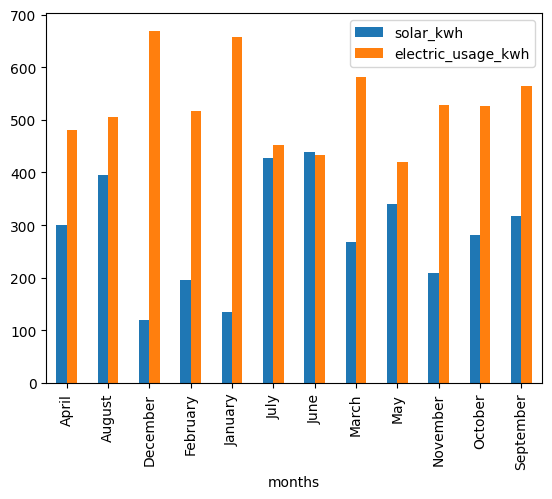

In [103]:
df[['solar_kwh','electric_usage_kwh']].plot(kind='bar')

<Axes: xlabel='months'>

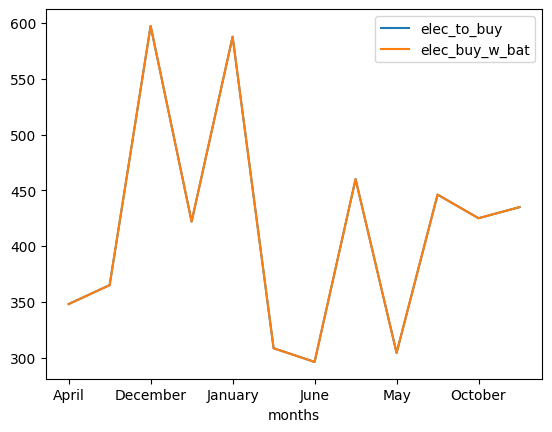

In [104]:
df[['elec_to_buy', 'elec_buy_w_bat']].plot(kind='line')